
# 🧱 Concrete Compressive Strength - Regression Analysis

This notebook analyzes the **Concrete Compressive Strength** dataset from the UCI Machine Learning Repository.  
The goal is to predict the compressive strength of concrete based on its components using regression models.



## Importing the Dataset

We use the `ucimlrepo` library to fetch the dataset directly from the UCI repository.


In [4]:
 pip install ucimlrepo

In [5]:

from ucimlrepo import fetch_ucirepo

# Fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# Extract features and target
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets


*texto em itálico*
## Exploring the Data

We explore the dataset to understand its structure, check for missing values, and analyze correlations.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    

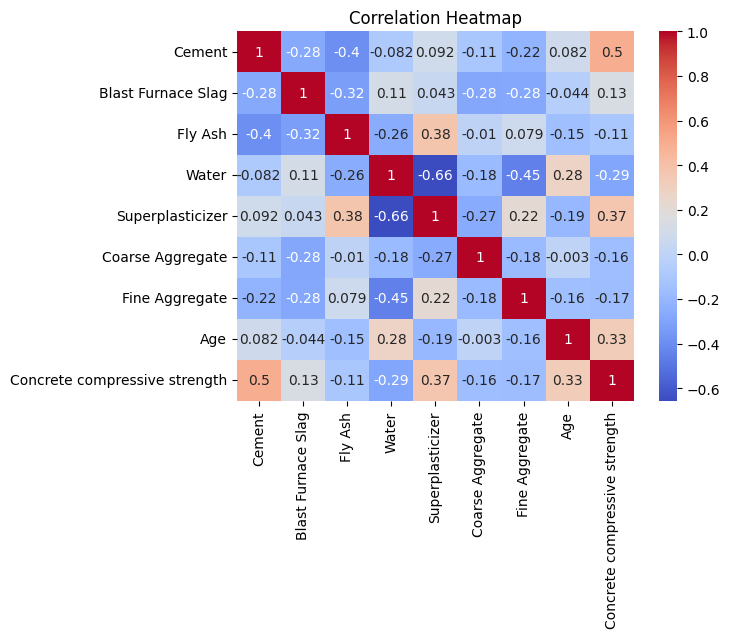

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([X, y], axis=1)
print(df.info())
print(df.describe())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



## Train/Test Split

We split the dataset into training and testing sets to evaluate how well the model generalizes.  
Usually, 80% of the data is used for training and 20% for testing.


In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression Model

We start with a **Linear Regression**, a simple and interpretable model that estimates a linear relationship between input features and the target variable.

### Metrics:
- **MAE (Mean Absolute Error):** Average of absolute errors — lower is better.
- **RMSE (Root Mean Squared Error):** Penalizes larger errors — lower is better.
- **R² (Coefficient of Determination):** Explains how much of the variance in the target is captured by the model — closer to 1 is better.


In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('R²:', r2)


MAE: 7.745559243921434
RMSE: 9.796475901624358
R²: 0.627553179231485



## Feature Importance (Random Forest)

To understand which variables influence the prediction the most, we use a Random Forest model and visualize the feature importances.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


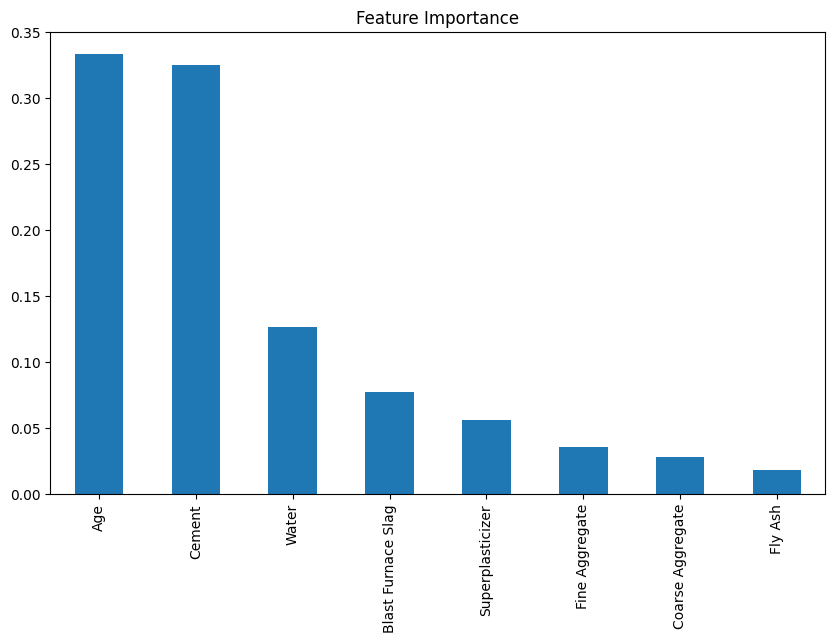

In [9]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance')
plt.show()



## Interactive Dashboard with Plotly

We create an interactive dashboard to visualize predictions, errors, and metrics.


In [12]:
import plotly.graph_objects as go
import plotly.express as px


import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

results_df = pd.DataFrame({'Real': y_test.values.flatten(), 'Previsto': y_pred.flatten()})

fig1 = px.scatter(results_df, x='Real', y='Previsto',
                  labels={'Real': 'Valor Real (MPa)', 'Previsto': 'Valor Previsto (MPa)'},
                  title='Valores Reais vs. Previstos: Avaliação da Performance do Modelo')
fig1.add_shape(type='line', x0=results_df['Real'].min(), y0=results_df['Real'].min(),
               x1=results_df['Real'].max(), y1=results_df['Real'].max(), line=dict(color='red', dash='dash'))


fig_comparacao = go.Figure()
fig_comparacao.add_trace(go.Scatter(y=results_df['Real'], mode='lines+markers', name='Valor Real'))
fig_comparacao.add_trace(go.Scatter(y=results_df['Previsto'], mode='lines+markers', name='Valor Previsto'))
fig_comparacao.update_layout(title='Comparação de Valores (Real vs. Previsto) ao Longo das Amostras',
                             xaxis_title='Amostra (Índice do Conjunto de Teste)',
                             yaxis_title='Resistência (MPa)')

fig1.show()
fig_comparacao.show()
